In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm # Progress bar
import random # Generator 
from time import perf_counter, perf_counter_ns # float value of time in seconds 
from datetime import timedelta, datetime # microsecond resolution for deltas (time,date)
from multiprocessing import Pool, cpu_count, freeze_support
from memory_profiler import profile

In [2]:
""" Testing tqdm Progress bar """
from tqdm import tqdm

for i in tqdm(range(int(9e6))):
    pass

  0%|          | 0/9000000 [00:00<?, ?it/s]

100%|██████████| 9000000/9000000 [00:02<00:00, 3205656.14it/s]


In [3]:
""" Testing pandas """
import pandas as pd
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
""" Testing random """
import random
# prints a random value from the list
list1 = [1, 2, 3, 4, 5, 6]
print(random.choice(list1))

5


In [58]:
""" Testing counter_seconds vs counter_ns """ 
from time import perf_counter, perf_counter_ns

# printing the time
start = perf_counter()
print(f'{perf_counter()} s')
end = perf_counter() - start
print(f'Time to call perf counter and print (ns): ', end/1e-9)

start = perf_counter_ns()
print(f'{perf_counter_ns()} ns')
end = perf_counter_ns() - start
print(f'Time to call perf counter ns and print (ns): ', end)

1056.787728538 s
Time to call perf counter and print (ns):  154500.00000782893
1056787932038 ns
Time to call perf counter ns and print (ns):  42700


		#####    STATS    #####
Counter		Average(ns): 1543.77	STD(ns): 19065.844237631587
Counter with counter_ns timer
Counter		Average(ns): 143.5634	STD(ns): 690.1014202133192

Counter_ns	Average(ns): 135.5012	STD(ns): 727.7961972960287

Conclusion: counter requires floating point conversion and takes more time to execute


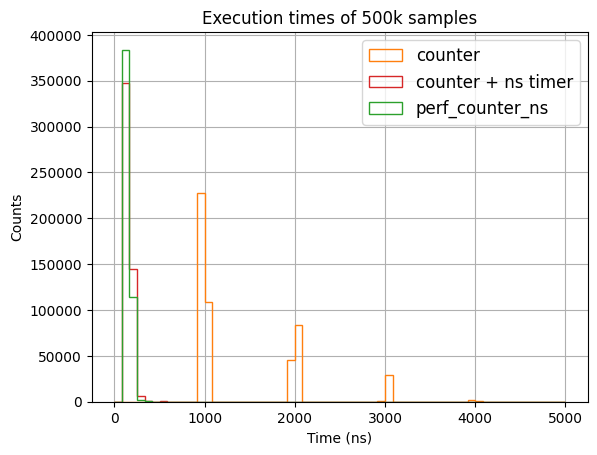

In [40]:
""" Plot the hist of execution times (counter vs counter_ns)"""
from time import perf_counter, perf_counter_ns
import numpy as np
import matplotlib.pyplot as plt

""" Sample collection 
- counter: dt of calling counter using counter for the timer
- counter_ns: dt of calling counter_ns using counter_ns for the timer
- counter_timer_ns: dt of calling counter using counter_ns for the timer
"""
# dt array of counter using counter for the timer 
counter = []
for _ in range(500_000): 
    start = perf_counter()
    call = perf_counter() # calling counter
    end = perf_counter() - start
    end = end*10e9
    counter.append(end)

# dt array of counter using counter_ns for the timer 
counter_timer_ns = []
for _ in range(500_000): 
    start = perf_counter_ns()
    call = perf_counter() # calling counter 
    end = perf_counter_ns() - start
    counter_timer_ns.append(end)

# dt array of counter_ns using counter_ns for the timer 
counter_ns = []
for _ in range(500_000): 
    start = perf_counter_ns()
    call = perf_counter_ns()
    end = perf_counter_ns() - start
    counter_ns.append(end)

# print(counter[0:4])
# print(counter_ns[0:4])
counter_av = np.average(counter)
counter_std = np.std(counter)

counter_timerNS_av = np.average(counter_timer_ns)
counter_timerNS_std = np.std(counter_timer_ns)

counter_ns_av = np.average(counter_ns)
counter_ns_std = np.std(counter_ns)

print('\t\t#####    STATS    #####')
print(f'Counter\t\tAverage(ns): {round(counter_av,2)}\tSTD(ns): {counter_std}')
print(f'Counter with counter_ns timer\nCounter\t\tAverage(ns): {counter_timerNS_av}\tSTD(ns): {counter_timerNS_std}')
print(f'\nCounter_ns\tAverage(ns): {counter_ns_av}\tSTD(ns): {counter_ns_std}')
print('\nConclusion: counter requires floating point conversion and takes more time to execute')
plt.hist(counter, 60, range=[0,.5e4], label='counter', histtype='step', facecolor = 'none', color = 'C1')
plt.hist(counter_timer_ns, 60, range=[0,.5e4], label='counter + ns timer', histtype='step', facecolor = 'none', color = 'C3')
plt.hist(counter_ns, 60, range=[0,.5e4], label='perf_counter_ns', histtype='step', facecolor = 'none',color = 'C2')
plt.xlabel('Time (ns)')
plt.ylabel('Counts')
plt.title('Execution times of 500k samples')
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.show()

In [39]:
""" Testing datatime """
from datetime import timedelta, datetime 

print(datetime.now()) # current date and time 

print(timedelta()) # is an object with several methods 
# represents the difference between two dates or times

t1 = timedelta(weeks = 2, days = 5, hours = 1, seconds = 33)
t2 = timedelta(days = 4, hours = 11, minutes = 4, seconds = 54)

t3 = t1 - t2

print("t3 =", t3)

# also used in seconds 

t = timedelta(days = 5, hours = 1, seconds = 33, microseconds = 233423)
print("Total seconds =", t.total_seconds())

2024-02-16 18:38:27.586063
0:00:00
t3 = 14 days, 13:55:39
Total seconds = 435633.233423
